
<!-- Image ou logo de l'institution (facultatif) -->
<div style="text-align: center; margin-top: 50px;">
    <img src="https://media-exp1.licdn.com/dms/image/C4D0BAQHrgk0foyuJvw/company-logo_200_200/0/1559125976448?e=2159024400&v=beta&t=NtJQpfX1B73q4yoE8sy2dBTXfaGAPdmtVeu3JVe2Nf8" width = 200>
    <p style="font-size: 30px; color: #2a4d69; width: 100%; text-align: center; margin: 20px 0;color: blue;">ECOLE NATIONALE DE LA STATISTIQUE ET DE L'ANALYSE ECONOMIQUE</p>
    <p style="font-size: 30px; color: #2a4d69; width: 100%; text-align: center; margin: 20px 0;color: blue;">PIERRE NDIAYE ENSAE-Dakar</p>
</div>

<!-- Titre principal de la page -->
<div style="text-align: center; margin-top: 100px;">
   <h1 style="font-size: 50px; color: tomato;">Projet MACHINE LEARNING 2</h1>

</div>

<!-- Sous-titre ou description -->
<div style="text-align: center; margin-top: 50px;">
    <h2 style="font-size: 30px; color: blue;">Segmentation des clients du site E-Commerce Olist</h2>
</div>

<!-- Présenté par section -->
<div style="background-color:lightblue; padding: 50px; text-align: left; font-family: Arial, sans-serif; border-radius: 15px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); margin-top: 50px;">
    <span style="font-size: 20px; color: black; font-weight: bold;">
    <strong>Présenté par</strong> : <br>
    AMADOU Moussa <br>
    NGONO FONE Yanick Bryan <br>
    Tou Brahima <br>
</span>
 <p style="font-size: 30px; color: #2a4d69; width: 100%; text-align: right; margin: 20px 0;color: blue;">
    Sous la supervision de : <br>
    Mme Mously DIAW <br>
    Data scientist, auto entrepreneure <br>
    Enseignante à l'ENSAE <br>
     </p>
</div>
                            
<div style="width:100%;text-align: center;">
<strong>Juin 2024</strong>
    </div>

<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; background-color:grey; color:black; font-size:2rem ">
        <b> Présentation du projet </b>
    </div>
</div>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
    Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.
Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance
(optionnel) basée sur une analyse de la stabilité des segments au cours du temps.  </h1>


<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; background-color:grey; color:black; font-size:2rem ">
        <b> Notre mission</b>
    </div>
</div>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs.
Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. 
Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer </h1>



<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Chargements des librairies néccessaires </h2>
</div>

In [1]:
# Importation des librairies standards
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
# Importation des librairies de Clustering 
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes


<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Importation des bases de données</h2>
</div>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Pour ce travail nous avons 9 bases de données. Principalement nous utiliserons la base client, la base order, la base order_items, data_product.
En fonction de nos besoins nous utiliserons les autres bases.</h1>


In [2]:
data_customers = pd.read_csv('olist_customers_dataset.csv')
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_orders = pd.read_csv('olist_orders_dataset.csv')
data_products = pd.read_csv('olist_products_dataset.csv')
data_trad = pd.read_csv('product_category_name_translation.csv')
data_geoloc = pd.read_csv('olist_geolocation_dataset.csv')
data_prod_cat = pd.read_csv('product_category_name_translation.csv')

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Constitution de la base clients</h2>
</div>

***Visualisation de la base customers***

In [16]:
# affichage de la base client 
data_customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

***Vérification des valeurs manquantes***

In [17]:
data_customers[data_customers.isna()].count()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
   Le jeu de données client contient 5 variables et 99441 observations. L'examen des valeurs manquantes revèle que le jeu de données ne contient pas de valeurs manquantes. </h1>

***Vérification des identifiants unique***

In [18]:
data_customers['customer_unique_id'].unique()

array(['861eff4711a542e4b93843c6dd7febb0',
       '290c77bc529b7ac935b93aa66c333dc3',
       '060e732b5b29e8181a18229c7b0b2b5e', ...,
       'e9f50caf99f032f0bf3c55141f019d99',
       '73c2643a0a458b49f58cea58833b192e',
       '84732c5050c01db9b23e19ba39899398'], dtype=object)

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Constitution de la base produit</h2>
</div>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
  L'objectif de cette partie est constituer une base produit. Pour ce faire nous allons dans un premier temps visualiser la base order_items qui nous donne des renseignements sur les produits.
    Cette dernière sera fusionnée avec la base produit afin de constituer une base produit contenant les informations necessaires.</h1>

In [22]:
data_order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

***valeur manquante***

In [23]:
data_order_items[data_customers.isna()].count()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
   Le jeu de données order_items contient 7 variables et 112650 observations. L'examen des valeurs manquantes revèle que le jeu de données ne contient pas de valeurs manquantes. </h1>

***Affichage des types des variables***

In [14]:
print(data_order_items.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


In [24]:
data_products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

***Valeurs manquantes***

In [25]:
data_order_items[data_products.isna()].count()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
   Le jeu de données products contient 9 variables et 32951 observations. L'examen des valeurs manquantes revèle que le jeu de données ne contient pas de valeurs manquantes. </h1>

***Affichage des types des variables***

In [26]:
print(data_products.dtypes)

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


In [3]:
data_order_reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

***Valeurs manquantes***

In [7]:
data_order_reviews[data_order_reviews.isna()].count()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
   Le jeu de données présente les avis de receuils de commentaire et ées notes attribuées par les clients suite à des commandes effectuées. Il contient 7 variables et 99224 observations. L'examen des valeurs manquantes revèle que le jeu de données ne contient pas de valeurs manquantes. </h1>

***Merger data_products et data_order_items***

In [11]:
data_order_item_product = data_order_items.merge(data_products, on = 'product_id', how='left')

In [28]:
data_order_item_product

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value   product_category_name  \
0       2017-09-19 09:45:35   58.90          13.29              cool_stuff   
1       2017-05-03 11:05:13  239.90          19.93                pet_shop   
2       2018-01-18 14:48:30  199.00          17.87        moveis_decoracao   
3       2018-08-15 10:10:18   12.99          12.79              perfumaria   
4       2017-02-13 13:57:51  199.90          18.14      ferramentas_jardim   
...                     ...     ...            ...                     ...   
112645  2018-05-02 04:11:01  299.99          43.41   utilidades_domesticas   
112646  2018-07-20 04:31:48  350.00          36.53  informatica_acessorios   
112647  2017-10-30 17:14:25   99.90          16.95           esporte_lazer   
112648  2017-08-21 00:04:32   55.99           8.72  informatica_acessorios   
112649  2018-06-12 17:10:13   43.00          12.79         cama_mesa_banho   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      58.0                       598.0                 4.0   
1                      56.0                       239.0                 2.0   
2                      59.0                       695.0                 2.0   
3                      42.0                       480.0                 1.0   
4                      59.0                       409.0                 1.0   
...                     ...                         ...                 ...   
112645                 43.0                      1002.0                 3.0   
112646                 31.0                       232.0                 1.0   
112647                 43.0                       869.0                 1.0   
112648                 56.0                      1306.0                 1.0   
112649                 47.0                       511.0                 1.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  650.0               28.0                9.0   
1                30000.0               50.0               30.0   
2                 3050.0               33.0               13.0   
3                  200.0               16.0               10.0   
4                 3750.0               35.0               40.0   
...                  ...                ...                ...   
112645           10150.0              

In [29]:
data_order_item_product.count()

order_id                      112650
order_item_id                 112650
product_id                    112650
seller_id                     112650
shipping_limit_date           112650
price                         112650
freight_value                 112650
product_category_name         111047
product_name_lenght           111047
product_description_lenght    111047
product_photos_qty            111047
product_weight_g              112632
product_length_cm             112632
product_height_cm             112632
product_width_cm              112632
dtype: int64

***Examen des valeurs manquantes***

In [49]:
# Calculer le nombre de valeurs manquantes pour chaque variable
missing_values_count = data_order_item_product.isnull().sum()

# Afficher le nombre de valeurs manquantes pour chaque variable
print("Nombre de valeurs manquantes pour chaque variable :\n", missing_values_count)

Nombre de valeurs manquantes pour chaque variable :
 order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64


In [31]:
data_order_item_product.loc[data_order_item_product['product_category_name'].isna()]

order_id  order_item_id  \
123     0046e1d57f4c07c8c92ab26be8c3dfc0              1   
125     00482f2670787292280e0a8153d82467              1   
132     004f5d8f238e8908e6864b874eda3391              1   
142     0057199db02d1a5ef41bacbf41f8f63b              1   
171     006cb7cafc99b29548d4f412c7f9f493              1   
...                                  ...            ...   
112306  ff24fec69b7f3d30f9dc1ab3aee7c179              1   
112333  ff3024474be86400847879103757d1fd              1   
112350  ff3a45ee744a7c1f8096d2e72c1a23e4              1   
112438  ff7b636282b98e0aa524264b295ed928              1   
112501  ffa5e4c604dea4f0a59d19cc2322ac19              2   

                              product_id                         seller_id  \
123     ff6caf9340512b8bf6d2a2a6df032cfa  38e6dada03429a47197d5d584d793b41   
125     a9c404971d1a5b1cbc2e4070e02731fd  702835e4b785b67a084280efca355756   
132     5a848e4ab52fd5445cdc07aab1c40e48  c826c40d7b19f62a09e2d7c5e7295ee2   
142     41eee23c25f7a574dfaf8d5c151dbb12  e5a3438891c0bfdb9394643f95273d8e   
171     e10758160da97891c2fdcbc35f0f031d  323ce52b5b81df2cd804b017b7f09aa7   
...                                  ...                               ...   
112306  5a848e4ab52fd5445cdc07aab1c40e48  c826c40d7b19f62a09e2d7c5e7295ee2   
112333  f9b1795281ce51b1cf39ef6d101ae8ab  3771c85bac139d2344864ede5d9341e3   
112350  b61d1388a17e3f547d2bc218df02335b  07017df32dc5f2f1d2801e579548d620   
112438  431df35e52c10451171d8037482eeb43  6cd68b3ed6d59aaa9fece558ad360c0a   
112501  bd421826916d3e1d445cb860cea3c0fb  59cd88080b93f3c18508673122d26169   

        shipping_limit_date   price  freight_value product_category_name  \
123     2017-10-02 15:49:17    7.79           7.78                   NaN   
125     2017-02-17 16:18:07    7.60          10.96                   NaN   
132     2018-03-06 09:29:25  122.99          15.61                   NaN   
142     2018-01-25 09:07:51   20.30          16.79                   NaN   
171     2018-02-22 13:35:28   56.00          14.14                   NaN   
...                     ...     ...            ...                   ...   
112306  2018-02-01 02:40:12  122.99          15.61                   NaN   
112333  2017-11-21 03:55:39   39.90           9.94                   NaN   
112350  2017-05-10 10:15:19  139.00          21.42                   NaN   
112438  2018-02-22 15:35:35   49.90          15.11                   NaN   
112501  2017-12-11 08:41:20   29.99          15.10                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
123                     NaN                         NaN                 NaN   
125                     NaN                         NaN                 NaN   
132                     NaN                         NaN                 NaN   
142                     NaN                         NaN                 NaN   
171                     NaN                         NaN                 NaN   
...                     ...                         ...                 ...   
112306                  NaN                         NaN                 NaN   
112333                  NaN                         NaN                 NaN   
112350                  NaN                         NaN                 NaN   
112438                  NaN                         NaN                 NaN   
112501                  NaN                         NaN                 NaN   

        product_weight_g  product_length_cm  product_height_cm  \
123                200.0               16.0                5.0   
125                700.0               35.0               14.0   
132                400.0               20.0               12.0   
142                200.0               16.0                2.0   
171               2200.0               16.0                2.0   
...                  ...                ...                ...   
112306             400.0               20.0               12.0

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Le diagnostic de la base montre que product_category_name, product_name_lenght, product_description_lenght et product_photos_qty contiennent des valeurs manquantes pour les observations. </h1>

product_category_name: 1.42% valeurs manquantes
product_name_lenght: 1.42% valeurs manquantes
product_description_lenght: 1.42% valeurs manquantes
product_photos_qty: 1.42% valeurs manquantes
product_weight_g: 0.02% valeurs manquantes
product_length_cm: 0.02% valeurs manquantes
product_height_cm: 0.02% valeurs manquantes
product_width_cm: 0.02% valeurs manquantes


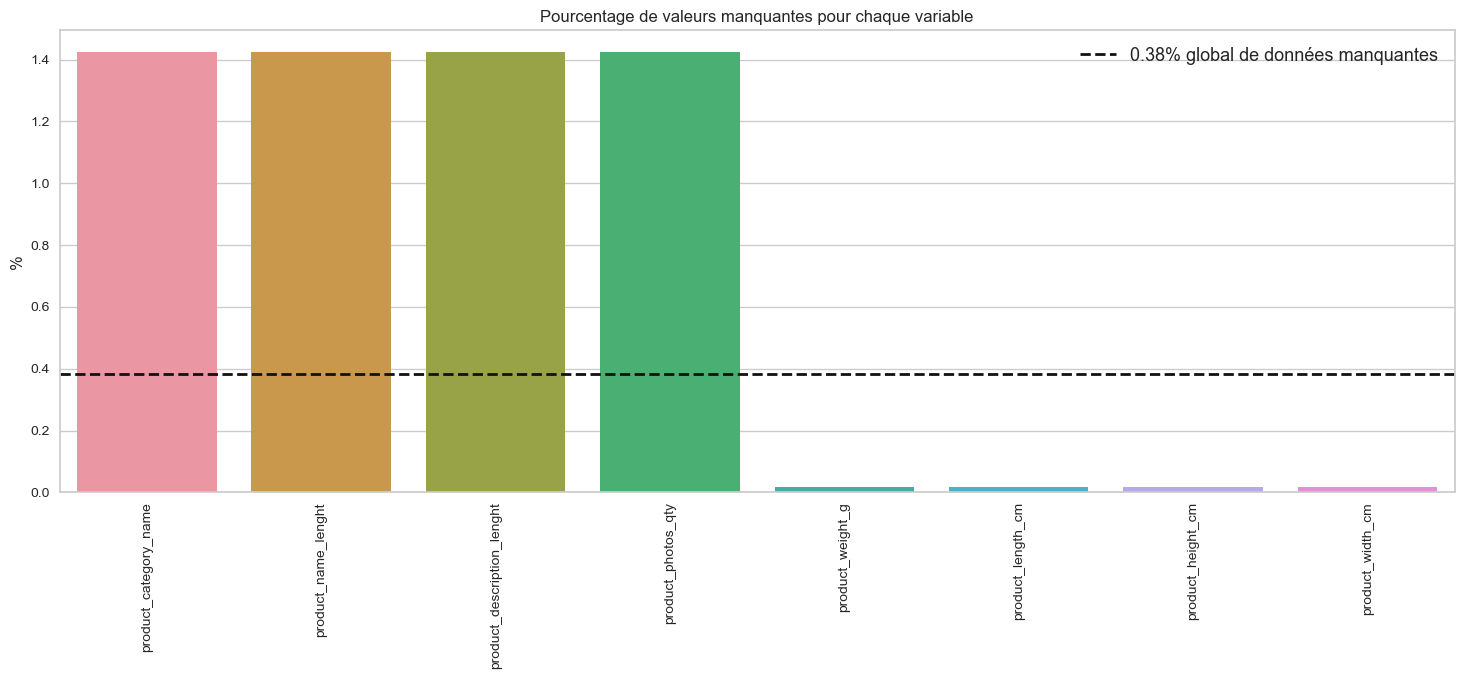

In [51]:
#On calcule la proportion de données manquantes pour chaque colonne et on plot !
# Sélectionner les colonnes spécifiques
columns_of_interest = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']
data_selected = data_order_item_product[columns_of_interest]

# Calculer le pourcentage des valeurs manquantes pour chaque variable
missing_percentages = data_selected.isnull().sum() / len(data_selected) * 100

# Afficher les pourcentages pour chaque variable
for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}% valeurs manquantes")

# Tracer le graphique
fig = plt.figure(figsize=(18, 6))

# Calculer le pourcentage global des données manquantes
null_prop = data_order_item_product.isnull().sum().sum() / (len(data_order_item_product) * len(data_order_item_product.columns)) * 100
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

# Tracer le pourcentage de valeurs manquantes par variable
sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

***Examen des valeurs manquantes***

In [44]:
data_order_item_product[data_order_item_product['product_id']=="ff6caf9340512b8bf6d2a2a6df032cfa"]

order_id  order_item_id  \
123   0046e1d57f4c07c8c92ab26be8c3dfc0              1   
5610  0ca8999f0176e37f35b6e49a9b2569da              1   
5614  0ca8999f0176e37f35b6e49a9b2569da              5   

                            product_id                         seller_id  \
123   ff6caf9340512b8bf6d2a2a6df032cfa  38e6dada03429a47197d5d584d793b41   
5610  ff6caf9340512b8bf6d2a2a6df032cfa  38e6dada03429a47197d5d584d793b41   
5614  ff6caf9340512b8bf6d2a2a6df032cfa  38e6dada03429a47197d5d584d793b41   

      shipping_limit_date  price  freight_value product_category_name  \
123   2017-10-02 15:49:17   7.79           7.78                   NaN   
5610  2017-10-13 10:49:27   7.79           8.85                   NaN   
5614  2017-10-13 10:49:27   7.79           8.85                   NaN   

      product_name_lenght  product_description_lenght  product_photos_qty  \
123                   NaN                         NaN                 NaN   
5610                  NaN                         NaN                 NaN   
5614                  NaN                         NaN                 NaN   

      product_weight_g  product_length_cm  product_height_cm  product_width_cm  
123              200.0               16.0                5.0              12.0  
5610             200.0               16.0                5.0              12.0  
5614             200.0               16.0                5.0              12.0

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Dans un premier temps on prend un exemple de produit à valeurs manquantes pour une commande donnée et on affiche toutes les observations de ce produit. Il ressort que pour toutes ces observations les variables product_name_lenght, product_description_lenght et product_photos_qty ont des valeurs manquantes. De ce fait en l'absence de commande de ce produit avec les informations pour ces variables nous suggeons à supprimer les observations y afférantes.
Par ailleur chacune de ces 4 variables citées ci haut présente 1.42% de valeurs manquantes, soit 0.38% du total. Au regard de ce qui précède nous optons finalement pour une suppression des valeurs manquantes. 
</h1>

***Suppression des valeurs manquantes***

In [12]:
# Supprimer les lignes contenant des valeurs manquantes dans les colonnes spécifiées
data_order_item_product_cleaned = data_order_item_product.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm'])
# Afficher la forme du DataFrame après suppression des valeurs manquantes
print("Forme du DataFrame après suppression des valeurs manquantes :", data_order_item_product_cleaned.shape)

Forme du DataFrame après suppression des valeurs manquantes : (111046, 15)


In [54]:
data_order_item_product_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111046 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    111046 non-null  object 
 1   order_item_id               111046 non-null  int64  
 2   product_id                  111046 non-null  object 
 3   seller_id                   111046 non-null  object 
 4   shipping_limit_date         111046 non-null  object 
 5   price                       111046 non-null  float64
 6   freight_value               111046 non-null  float64
 7   product_category_name       111046 non-null  object 
 8   product_name_lenght         111046 non-null  float64
 9   product_description_lenght  111046 non-null  float64
 10  product_photos_qty          111046 non-null  float64
 11  product_weight_g            111046 non-null  float64
 12  product_length_cm           111046 non-null  float64
 13  product_height_cm  

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Base commande</h2>
</div>

In [56]:
data_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

***valeur manquante***

In [58]:
data_orders[data_orders.isna()].count()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
   Le jeu de données order_items contient 8 variables et 99441 observations. L'examen des valeurs manquantes revèle que le jeu de données ne contient pas de valeurs manquantes. </h1>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Constitution de la base finale</h2>
</div>

***Merger data_products et data_order_items***

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Dans cette partie, nous constituerons la base finale qui nous servira de jeu de données de l'etude.
Pour la constituer, nous procedons comme suit: Dans un premier temps, nous mergeons la base commande et la base produit. 
Dans un second temps, on fusionne la base mergée avec la base client. </h1>

In [13]:
data_final1 = data_orders.merge(data_order_item_product_cleaned, on = 'order_id', how='left')

In [14]:
data_final2 = data_final1.merge(data_customers, on = 'customer_id', how='left')

In [62]:
data_final2[data_final2.isna()].count()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [5]:
data_order_payments

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [7]:
data_order_payments[data_order_payments.isna()].count()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [15]:
data_final3 = data_final2.merge(data_order_payments, on = 'order_id', how='left')

In [65]:
data_final3[data_final3.isna()].count()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments

***Sauvegarde de la base finale***

In [ ]:
data_final[data_final.isnull()].count()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
On constate que certaines lignes d'observations dans la base conrespondant notament à des commandes n'ont pas d'articles commandé et par conséquent on observe une absence au niveau des caractéristiques.
Cela suggère l'enregistrement des commandes interrompues ou annulées par des clients. Celles.ci ne nous apportent donc pas d'information: elles seront supprimées</h1>

In [16]:
data_final4 = data_final3.merge(data_order_reviews, on = 'order_id', how='left')

In [17]:
# Sauvegarder le DataFrame en tant que fichier CSV
data_final4.to_csv('Data_final.csv', index=False)

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">ANALYSE EXPLORATOIRE</h2>
</div>

In [18]:
data_final = pd.read_csv('Data_final.csv')

***Examen des valeurs manquantes***

In [22]:
data_final4[data_final4.isna()].count()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
On note que notre base reconstituer ne comporte ni de NA ni de cellule vide. 

Cependant une exploration visuelle de la base laisse appaître des cellules vides. 

Ces cellules correspondent à des commandes initiées non achevées ou annulées. 

Cela est observale à partir de la variable order_statut. 

De telles observations ne sont pas considerées comme des valeurs manquantes. D'où les ***zéro*** au niveau de l'examen des valeurs manquantes. 
</h1>

***Distribution de la variable order_status***

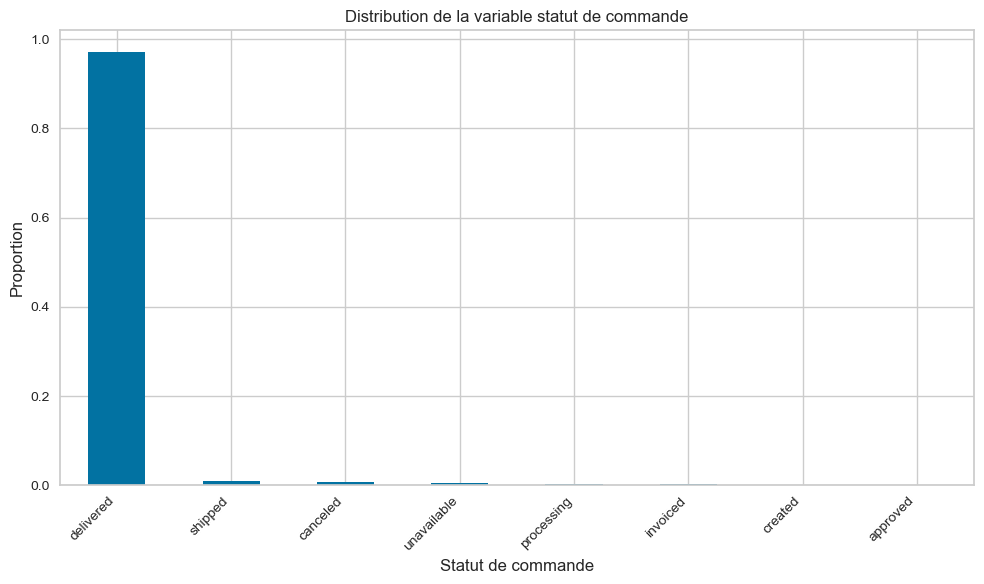

In [29]:
# Calculer les proportions
proportions_categories_produits = data_final['order_status'].value_counts(normalize=True)

# Créer un histogramme
plt.figure(figsize=(10, 6))
proportions_categories_produits.plot(kind='bar')
plt.title('Distribution de la variable statut de commande')
plt.xlabel('Statut de commande')
plt.ylabel('Proportion')  # Changer le label de l'axe y en "Proportion"
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
La distribution du statut de la commande revèle plus de 97% des commandes initiées ont été livrées et moins d'un 3% des commandes initiées ont été soit annulés ou soient shipped(expédié) ou ne sont pas valides. 

Dans notre étude, il convient de noter que nous voulons segmenter les client du marché olist, alors l'analyse visant à aider l'entrpise olist à segmenter la clientèle doit porter sur les commandes livrées puisque cela nous permet non seulement d'avoir toutes les informations sur les produits et le client mais aussi les appreciations de retour. Partant de ces considérations nous allons nous interesser aux commandes ayant un statut delivré.
</h1>

***Suppression de toutes les commandes non delivrées***

In [19]:
data_final = data_final[data_final['order_status'] == 'delivered']

In [ ]:
data_final.drop[data_final['order_item_id'].isna()]

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
On observe une tendance abérrantes des prix pour chaque produit. En effet pour chaque produit de nombreuses commandes ont des prix au-dessus des intervalles interquartile
</h1>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">La segmentation RFM</h2>
</div>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
La méthode RFM est une méthode de segmentation principalement développée à l'origine pour les actions de marketing direct des véadistes et qui s'applique désormais également aux acteurs du e-commerce. prend en compte la Récence (date de la dernière commande), la Fréquence des commandes et le Montant (de la dernière commande ou sur une période donnée) pour établir des segments de clients homogènes.
</h1>

# Score de Récence:
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
    Pour evaluer la recence de commande pour un client donné nous determinons la date de reference a partir de laquelle sera calculée le temps ecoulé depuis les differentes commande. Parce que nous ne connaissons pas la date a laquelle a ete collectée les données sur lesquelles portent notre étude, nous considerons en guise de date de reference, la date  a laquelle a été effectuée l'achat le plus recent dans la base. lorsque l'on convertis cette date en nombre, cela nous donne le plus grand nombre pour la variable 'order_purchase_timestamp'.
</h1>

In [ ]:
# Convertir les dates au format datetime
data_final['order_purchase_timestamp'] = pd.to_datetime(data_final['order_purchase_timestamp'])
date_reference = data_final['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Le score de Recence correspond a l'ecart entre la date de reference, et la commande la plus recente de chaque client, correspondant au max parmi ses valeurs prises pour la variable 'order_purchase_timestamp'.
</h1>

# Score de frequence

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Nous mesurons la frequence d'un client par le nombre de fois qu'il a passé une commande livré qui lui a ete livrée, c'est a dire le nombre de 'order_id' par client. plus il a de commande livré , plus il est reccurent dans ses achats.
</h1>

# Score de Montant
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Il s'agit a ce niveau de la valeur totale des articles commandés par les clients a l'issu de leur differentes commandes. Pour cela , nous effectuons la somme des montants payés a l'issu des coomandes délivrées. Prealablement nous nous assurons que ces chiffres puissent être sommable.
    </h1>

In [ ]:
#convertir les montant payés pour faciliter les calculs
data_final['payment_value'] = pd.to_numeric(data_final['payment_value'])

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Nous élargissons cette methode en completant certains indicateurs necessaire pour prendre en compte le niveau de pouvoir d'achat des clients, leurs score accordé selon leurs satisfactions, le degré de constance dans les habitudes d'achats
    </h1>

# Score relatif au pouvoir d'achat moyen de chaque client
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

En construisant cet indicateur, l'objectif est de catégoriser les clients selon le prix, en moyenne, qu'ils sont prêts à payer par unité d'article acheté à travers leurs différentes commandes livrées. Cela nous permettra de mieux comprendre les préférences des clients en matière de type d'articles, qu'il s'agisse de produits de première nécessité ou de luxe. Cet indicateur est crucial dans notre étude, d'autant plus que, dans la littérature économique, Engels (lauréat du prix Nobel d'économie en 2003). Cet indicateur permettra ainsi de distinguer la clientèle selon qu'elle achète des produits de luxe( a prix unitaire relativement eleve) ou bon marché ( relativement bas). Ainsi, nous pourrons facilement identifier le niveau de revenu de nos clients.
    </h1>

In [ ]:
#convertir les prix en numerique pour faciliter les calculs
data_final['price'] = pd.to_numeric(data_final['price'])

# Le score de constance dans les habitudes d'achats

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Cet indicateur distingue les clients réguliers des clients occasionnels, en mesurant a quel interval constant de jours distincts en moyenne les clients font leurs achats sur la plateforme commerciale olist. Cela peut contribuer a dresser des profils d'habitude de commande et orienter des strategie de journée de solde et detecter des periodes d'intenses commandes (si un certains nombres de consommateurs passent une commande environ tout les J-jours une strategie de placement de produit selon leurs centres d'interets peut etre pensée, des facilités peuvent leur etre accodés sur la base de leur constance, etc.). Pour cela il faudra determiner le nombre de jour distincts sur lesquels s'etendent les commandes livrées a un client donnée dans la base actuelle.

Ainsi, elle vient en complement de la frequence qui peut etre sensible a des periodes d'activité intense pouvant etre passsagere ainsi qu'au cas ou le client effectue plusieurs commandes dans une journée.

Nous considerons que ce score vaut zéro si les achats du client ont faits le même jour.
    </h1>

In [ ]:
# Definition de la fonction de score de constance de chaque client.
def calculate_average_constance(customer_unique_id):
    '''
    Input : customer_unique_id
    Output : Average recency between two consecutive purchase dates for the given customer
    '''
    # Filtrer les dates convertis du client par orde
    date_command_customer = data_final.loc[data_final['customer_unique_id'] ==customer_unique_id, 'order_purchase_timestamp']
    dates = sorted(date_command_customer.dt.normalize().unique())
    if len(dates) > 1:
        # Calculate intervals between consecutive dates
        recency_intervals = np.diff(dates).astype('timedelta64[D]').astype(int)
        return np.mean(recency_intervals)
    else:
        # If only one purchase, return a default value
        
        return float('0')


In [ ]:
customer_unique_id='7c396fd4830fd04220f754e42b4e5bff'
calculate_average_constance(customer_unique_id)

In [ ]:
def jours_distincts(customer_unique_id):
    '''
    Input : customer_unique_id
    Output : Nombre de jours pendant lesquels le client a passé une commande
    '''
    # Filtrer les commandes du client
    customer_orders = data_final[data_final['customer_unique_id'] == customer_unique_id]
    
    # Obtenir les dates uniques des commandes
    unique_dates = customer_orders['order_purchase_timestamp'].dt.normalize().unique()
    
    # Retourner le nombre de jours
    return len(unique_dates)

# Score accordé selon leurs satisfactions
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Cet indicateur calcule la sastifaction accorde à un produit de olist qui lui a été livrré.Nous postulons que les clients qui n'ont pas de score ont au moins été sastifait.En effet, en marketing si un client n'est pas sastifait, il a tendance à faire un retour. Partant de ces consideration, nous attribuerons un score de 3 qui n'ont pas de score
    </h1>

In [ ]:
x=data_final.loc[data_final['review_score'].notna(),'review_score']
y=x.mean()
def satisfaction_score(customer_unique_id):
    # Extraire les scores sur les commandes livrés d'un client donnée
    satisfaction_score=data_final.loc[data_final['customer_unique_id']==customer_unique_id,'review_score']
   
    #extraire les scores attribués par le client
    score=satisfaction_score.loc[satisfaction_score.notna()]
    if len(score)>0 :
        score_moyen = score.mean()
        return score_moyen 
    else:
        y=3
        return y #il faut revoir ceci et remplacer par y=3 

In [37]:
customer_unique_id='7c396fd4830fd04220f754e42b4e5bff'
satisfaction_score(customer_unique_id)

4.25

## Mise en oeuvre du calcul des indicateurs

In [77]:
indicator_rfm = data_final.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (date_reference - x.max()).days, 
    'order_id': 'count',
    'payment_value': 'sum',
    'price' :  lambda x: (x.mean())
    }).reset_index()
indicator_rfm.columns = ['customer_unique_id', 'recence','frequence', 'montant','prix_moyen']

In [82]:
indicator_rfm['review_score_moyen']=indicator_rfm['customer_unique_id'].apply(lambda x: satisfaction_score(x))
indicator_rfm['constance']=indicator_rfm['customer_unique_id'].apply(lambda x: calculate_average_constance(x))
indicator_rfm['jours_de_commande_distincts']=indicator_rfm['customer_unique_id'].apply(lambda x: jours_distincts(x))

In [85]:
# Sauvegarder le DataFrame en tant que fichier CSV
indicator_rfm.to_csv('base_indicateurs.csv', index=False)

***Réimportation de la base***

In [2]:
indicator_rfm = pd.read_csv('base_indicateurs_rfm.csv')

In [84]:
indicator_rfm.loc[indicator_rfm['customer_unique_id']=='7c396fd4830fd04220f754e42b4e5bff']

customer_unique_id  recence  frequence  montant  \
46728  7c396fd4830fd04220f754e42b4e5bff      381          4    82.82   

       prix_moyen  review_score_moyen  constance  jours_de_commande_distincts  
46728       31.34                4.25       28.0                            2

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Ces indicateurs s'interpretent ainsi, avec l'exemple ci dessus:
le client '7c396fd4830fd04220f754e42b4e5bff' a effectué 4 conmmandes sur 2 jours distincts, dont la plus recente a eu lieu 381 jours plutôt( par rapport a la date de reference), soit il y a près d'un an. Il commande en moyenne apres 28 jours. Le montant total a l'issu de ces commandes est de 82.2 et le prix moyen consentis est de 31.34. Le score moyen attribué par ces clients a l'issu de ces commandes de 4.
    </h1>

## Vsualisation graphique du comportement de la clientele suivant les indicateurs concus

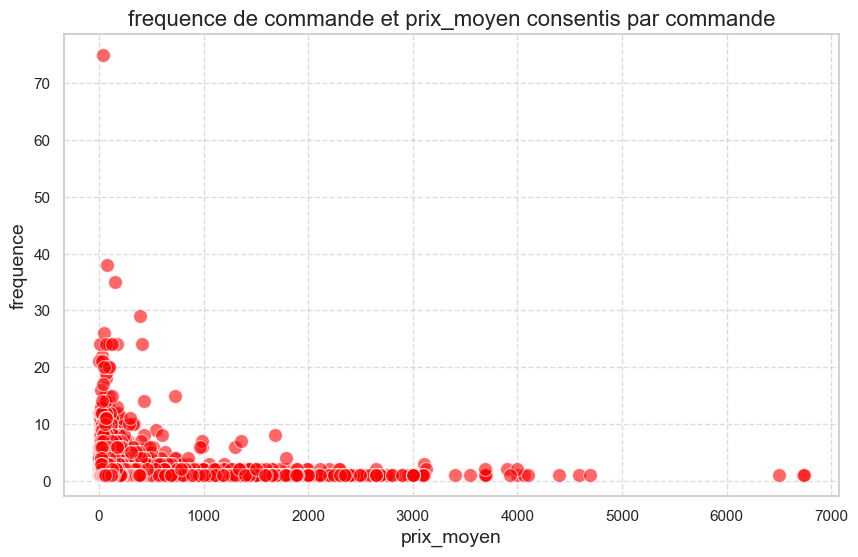

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
# Paramètres esthétiques pour Seaborn
sns.set(style="whitegrid")

# Créer un graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prix_moyen', y='frequence', data=indicator_rfm, s=100, color='red', alpha=0.6, edgecolor='w')

# Ajouter des titres et des labels
plt.title('frequence de commande et prix_moyen consentis par commande', fontsize=16)
plt.xlabel('prix_moyen', fontsize=14)
plt.ylabel('frequence', fontsize=14)

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()


 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
 Il ressort du graphique que le nombre de clients decroit au fur et à mesure que le prix moyen des achats augmente.
    A titre illustratif, la majeure aprtie des clients font des achats des artciles dont le prix moyen n'excède pas 500.
    Par contre ils sont très peu ces clients de Olist dont le prix moyen de leur article excède 2000.
    Cette information est très capitale car nous permettant de comprendre leur disposition financière dans les achats.
    </h1>

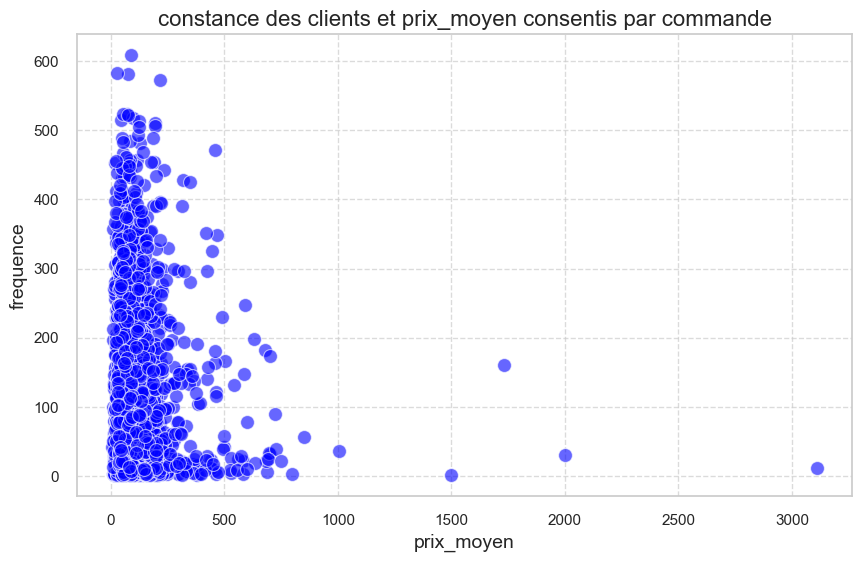

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Paramètres esthétiques pour Seaborn
sns.set(style="whitegrid")

# Créer un graphique
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prix_moyen', y='constance', data=indicator_rfm, s=100, color='blue', alpha=0.6, edgecolor='w')

# Ajouter des titres et des labels
plt.title('constance des clients et prix_moyen consentis par commande', fontsize=16)
plt.xlabel('prix_moyen', fontsize=14)
plt.ylabel('frequence', fontsize=14)

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()


In [ ]:
import numpy as np

# Remplacer les valeurs infinies par 0 dans la colonne 'resence'
indicator_rfm['constance'] = indicator_rfm['constance'].replace([np.inf], 0)

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">MODELISATION</h2>
</div>

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Olist souhaite obtenir une segmentation de ses clients pour optimiser leurs campagnes marketing. 

L'objectif est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données anonymisées. 

Nous fournirons une description de la segmentation et de sa logique, ainsi qu'une analyse de la stabilité des segments dans le temps. 

Des méthodes non supervisées seront utilisées pour regrouper les clients aux profils similaires.
    </h1>

# Sommaire

1. Clustering avec l'algorithme du K-Means
2. Réduction dimensionnelle - PCA
3. K-Means après réduction de dimenssions
4. Stabilité à l'initialisation du K-Means
5. Clustering avec l'algorithme du K-Prototypes

7. Clustering avec DBSCAN
8. Herarchiqual clustering selon Ward

In [7]:
!pip install kmodes

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;">    </h1>
<div style="border: 3px solid RGB(51,165,182);" >
<h2 style = "text-align:center;color:orange;font-family:Times New Roman;font-size:30px;">Chargements des librairies néccessaires </h2>
</div>

In [3]:
# Standards Librairies import
%matplotlib inline
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes

# Clustering avec l'algorithme du K-Means
 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
K-Menas est une méthode non supervisée. Il fait partie des algorithmes de clustering les plus couramment utilisés pour analyser des jeux de données caractérisés par divers descripteurs.

Il consiste à regrouper les données en de groupes homogènes appelé clusters. 

Le processus commence par l'initialisation des centroïdes, choisis au hasard dans le jeu de données. Ensuite, K-Menas alterne entre deux étapes pour optimiser les centroïdes et leurs clusters :

- Assigner chaque objet au centroïde le plus proche.

- Réajuster chaque centroïde selon la moyenne des descripteurs des objets qui lui sont assignés.

L'algorithme converge après plusieurs itérations, trouvant une partition stable du jeu de données. Toutefois, le nombre de clusters doit être défini par l'utilisateur.
Pour déterminer la valeur optimale de K, on fait recours à la méthode de coude. Cette méthode consiste à representer le graphique avec les données. En ajustant le modèle K-Means pour une plage de valeurs de K, le graphique résultant montre une courbe qui ressemble à un bras. Le "coude" (point d'inflexion sur la courbe) indique le nombre optimal de K.
    </h1>

In [4]:
categorical_features = list(indicator_rfm.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categorical_features

['customer_unique_id']

In [5]:
numerical_features = list(indicator_rfm.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['recence',
 'frequence',
 'montant',
 'prix_moyen',
 'review_score_moyen',
 'constance',
 'jours_de_commande_distincts']

***On prepare ensuite le preprocessor:***

In [6]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Méthode du coude : détermination du meilleur K
Un pipeline SKLearn est créé pour y inclure le preprocessing et la visualisation de la méthode du coude de notre KMeans.
    </h1>

In [8]:
indicator_rfm.isna().any()

customer_unique_id             False
recence                        False
frequence                      False
montant                        False
prix_moyen                      True
review_score_moyen             False
constance                      False
jours_de_commande_distincts    False
dtype: bool

In [7]:
# Supprimer les lignes où la colonne 'prix_moyen' contient des valeurs NaN
indicator_rfm = indicator_rfm.dropna(subset=['prix_moyen'])

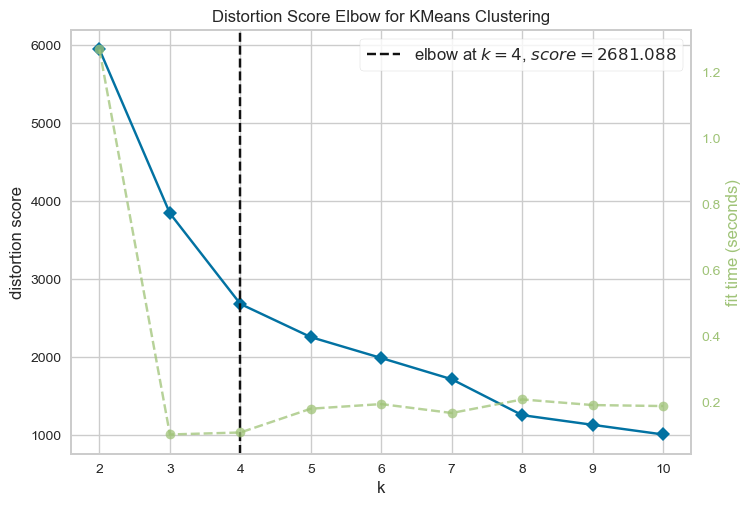

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
X = indicator_rfm.copy()
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
En utilisant la méthode du coude basée sur le score de distortion (qui mesure la moyenne des carrés des distances par rapport aux centres), 

une segmentation en 4 clusters (K=4) semble être le choix optimal.

Nous auront 4 groupes homogènes 
    </h1>

# Coefficient de silhouette

Le coefficient de silhouette est une mesure de la qualité d'un clustering. Il mesure à quel point les objets sont similaires à ceux de leur propre cluster (cohérence intra-cluster) par rapport aux objets des autres clusters (séparation inter -cluster).

Nous allons utiliser ce coefficient pour vérifier si le clustering fonctionne 

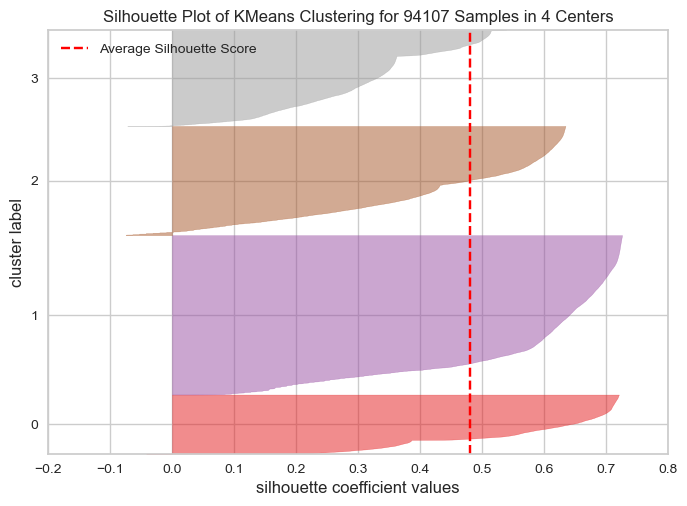

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 94107 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
# Meilleur K dans la méthode du coude
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Vusualisation de Silhouette 
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

***Commentaire***

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Le score de chaque échantillon est calculé en faisant la moyenne du coefficient de silhouette (différence entre la distance moyenne intra-cluster et la distance moyenne du cluster le plus proche pour chaque échantillon), normalisée par la valeur maximale. Cela nous donne un score entre -1 et 1, qui nous permet de déterminer si la séparation est efficace ou si les points sont assignés au mauvais cluster.

Dans notre cas, les clusters semblent relativement bien répartis et les séparations sont claires avec cependant quelques erreurs sur l'un des clusters.
    </h1>

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Comme vu au cours nous allons tester d'autres types de métriques qui nous permettent de trouver le meilleur K :

* Silouhette : rapport moyen entre la distance intra-cluster et la distance du cluster le plus proche,
* Calinski Harabasz : rapport entre la dispersion des grappes dans et entre les groupes.
    </h1>

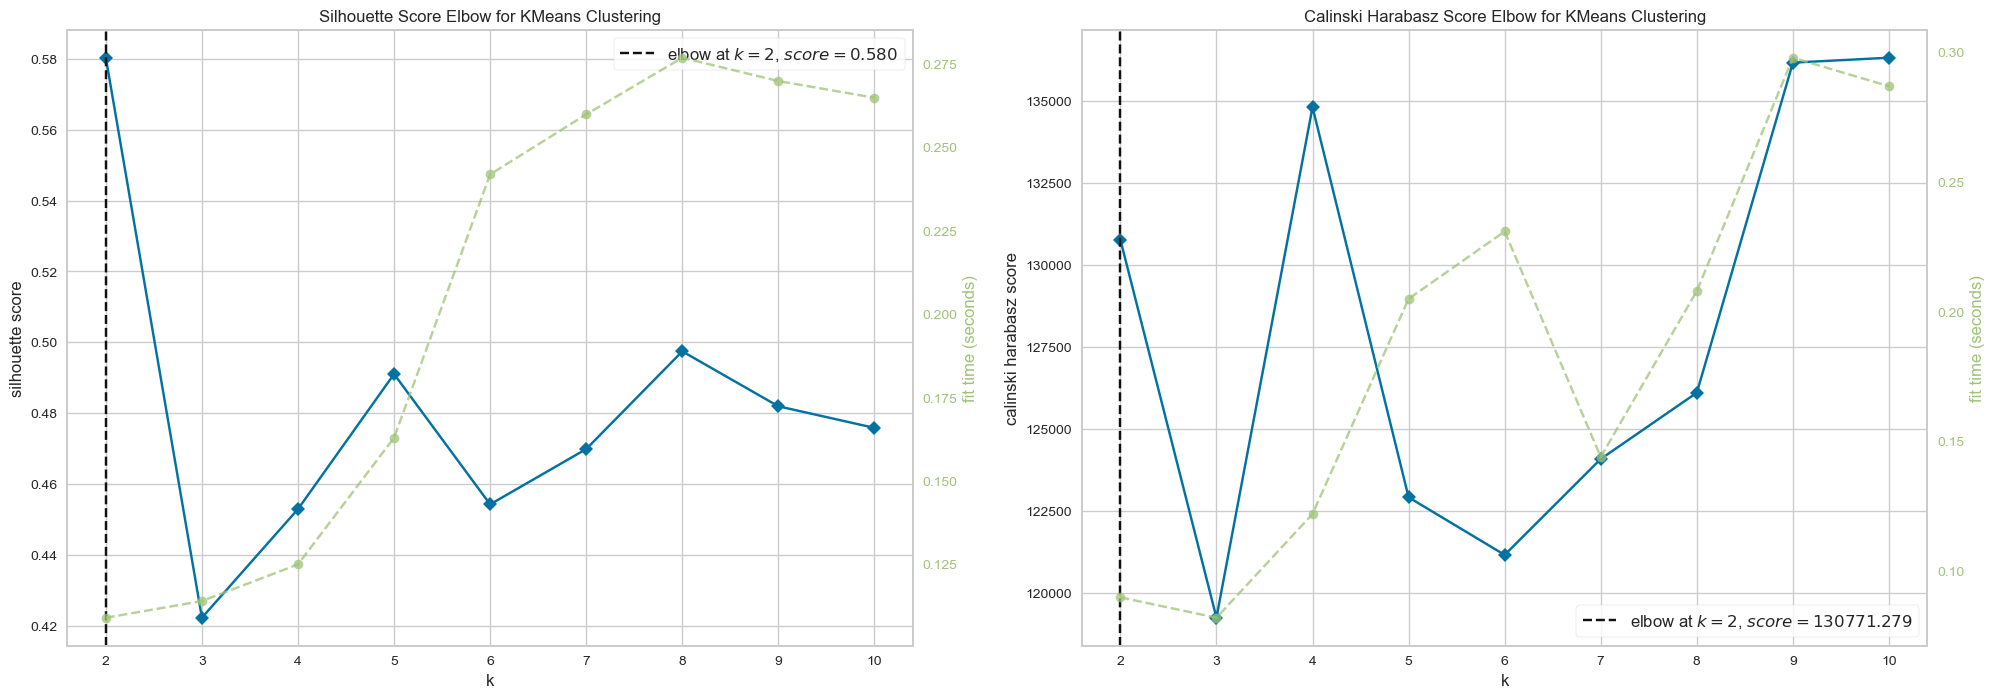

In [27]:
# Méthode du coude avec différentes métriques
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(X)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Dans ce cas, avec un score de silhouette de 0.580 à K=2, cela suggère que les clusters sont bien séparés les uns des autres et que les points à l'intérieur de chaque cluster sont assez proches les uns des autres. 

Un score de silhouette supérieur à 0,5 est généralement considéré comme indiquant une bonne séparation des clusters.

Ainsi, un score de 0.580 à K=2 indique que les données sont bien segmentées en deux clusters distincts avec une bonne cohérence intra-cluster et une séparation inter-cluster appropriée.
    </h1>

# Distances intercluster

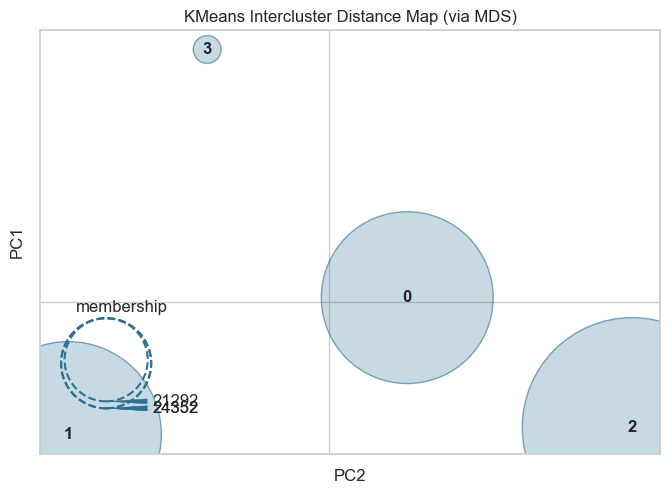

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [28]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

 <h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 
Sur cette projection en 2D, on remarque que les différents clusters sont bien séparés sur les 2 premières composantes principales. Le clustering semble donc performant et il faut a présent identifier les composantes métier de chaque cluster.

Analyse des différents clusters

A présent, nous allons entrainer notre KMeans avec le K optimal sélectionné et affecter son cluster à chaque client. Ainsi, nous pourrons analyser les différences entre chaque cluster :
    </h1>

In [ ]:
# KMeans Pipeline with best K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
indicator_rfm["kmeans_label"] = kmeans_labels

***Nous allons dans un premier temps grouper les individus par cluster pour analyser les moyennes*** :

In [33]:
# Assurez-vous que indicator_rfm contient le même nombre de lignes que kmeans_labels
if len(indicator_rfm) == len(kmeans_labels):
    # Réinitialiser l'index de indicator_rfm si nécessaire
    indicator_rfm.reset_index(drop=True, inplace=True)
    # Ajouter les étiquettes de clustering
    indicator_rfm["kmeans_label"] = kmeans_labels
    print("Les étiquettes de clustering ont été ajoutées avec succès.")
else:
    # Filtrer indicator_rfm pour qu'il contienne le même nombre de lignes que kmeans_labels
    indicator_rfm = indicator_rfm.loc[:len(kmeans_labels)-1].copy()
    # Ajouter les étiquettes de clustering
    indicator_rfm["kmeans_label"] = kmeans_labels
    print("Les étiquettes de clustering ont été ajoutées avec succès après avoir filtré indicator_rfm.")


Les étiquettes de clustering ont été ajoutées avec succès.


In [ ]:
kmeans_clusters_means = indicator_rfm.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

In [34]:
# Spécifier les colonnes numériques pour calculer les moyennes
numeric_columns = ['recence', 'frequence','montant','constance', 'prix_moyen','review_score_moyen','jours_de_commande_distincts']  # Remplacez par vos colonnes numériques

# Calculer les moyennes pour chaque cluster
kmeans_clusters_means = indicator_rfm.groupby("kmeans_label")[numeric_columns].mean().reset_index()
kmeans_clusters_means

kmeans_label     recence  frequence     montant  constance  prix_moyen  \
0             0  189.102461   1.194959  191.542877   3.718604  124.703627   
1             1  291.212541   1.396850  313.559377   1.212351  136.561179   
2             2  236.821063   1.239680  208.571671   3.413297  120.852805   
3             3  472.970702   1.224864  199.765827   0.921138  128.911460   

   review_score_moyen  jours_de_commande_distincts  
0            4.996707                     1.031585  
1            1.231126                     1.014687  
2            3.649360                     1.031124  
3            4.751725                     1.016483

In [ ]:
X_scaled = preprocessor.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

In [49]:
# Vérifiez si le nombre de colonnes dans X correspond au nombre de colonnes dans X_scaled
if X.shape[1] != X_scaled.shape[1]:
    # Si les colonnes ne correspondent pas, ajustez les colonnes de X
    # Ici, nous supposons que X_scaled a une colonne supplémentaire par rapport à X
    # Supprimez une colonne de X pour correspondre aux dimensions de X_scaled
    X = X.iloc[:, :-1]

# Réessayez de créer le DataFrame avec les données transformées
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# Ajouter les étiquettes de clustering
X_scaled_df["kmeans_label"] = kmeans_labels

# Grouper par étiquettes de clustering et calculer les moyennes
X_scaled_clusters = X_scaled_df.groupby("kmeans_label").mean()
X_scaled_clusters

recence  frequence   montant  prix_moyen  review_score_moyen  \
kmeans_label                                                                  
0             0.243656   0.002635  0.001752    0.018392            0.999177   
1             0.375923   0.005363  0.002868    0.020153            0.057781   
2             0.305468   0.003239  0.001908    0.017820            0.662340   
3             0.611361   0.003039  0.001827    0.019017            0.937931   

              constance  
kmeans_label             
0              0.006106  
1              0.001991  
2              0.005605  
3              0.001513

***Projetons à présent ces différentes moyennes sur un Radar plot avec la librairie Ploty pour visualiser les différences entre cluster*** :

In [53]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

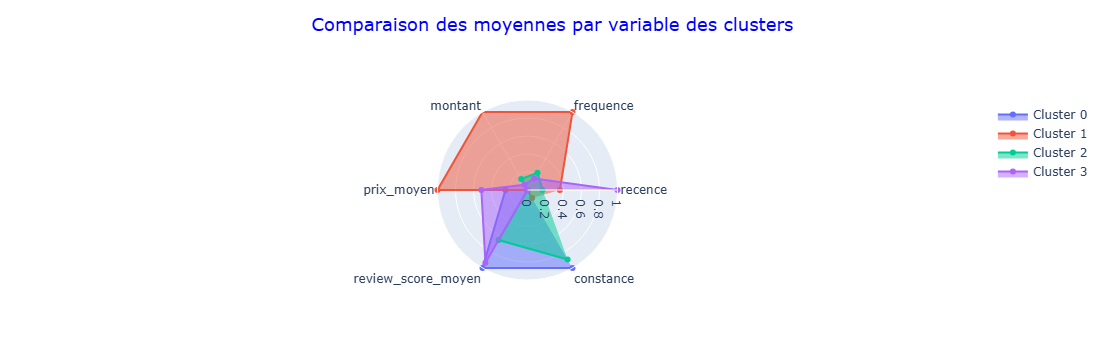

In [51]:
plot_radars(data=X_scaled_clusters,
            group="kmeans_label")

# Interprétation métier des clusters
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

* Groupe 0 : Ces clients sont ireguliers dans la boutique olist qui sont sastifaits des commandes effectuées avec des prix moyens relativement faible sur un nombre de commande très réduit.

* Groupe 1 : Clients relativement moins récents et relativement régulier qui lors de leur  achat ont consentis un prix moyen très élevé. Il s'agit d'une clientèle ihabituelle dont les achats sont éffectués à un montant très élevé
    
* Groupe 2 : Regroupe les clients qui sont relativement irrégulier et mons récents et effectuent peu de commande à un prix moyen relativement faible. 
    
* Groupe 3 : Ce sont des clients très réccents et réguliers qui sont satisfaits de leurs commande. Ils ont faible nombre de commande mais effectué dans la même journée. Ils ont un consentement pour un prix moyen considerable sur les commandes.

Nous allons à présent réaliser une réduction dimensionnelle pour vérifier si le clustering est réalisable sur un nombre réduit de variables sans perturber les groupes
    </h1>

# Réduction dimensionnelle - PCA
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

Nous allons réaliser une Analyse en Composantes Principales pour vérifier s'il est possible de catégoriser nos clients avec moins de variables. L'objectif étant de conserver une inertie de 95%
    </h1>

In [63]:
# PCA Pipeline
pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver='full'))])
pca.fit(X)
X_projected = pca.transform(X)

## Eboulis des valeurs propres

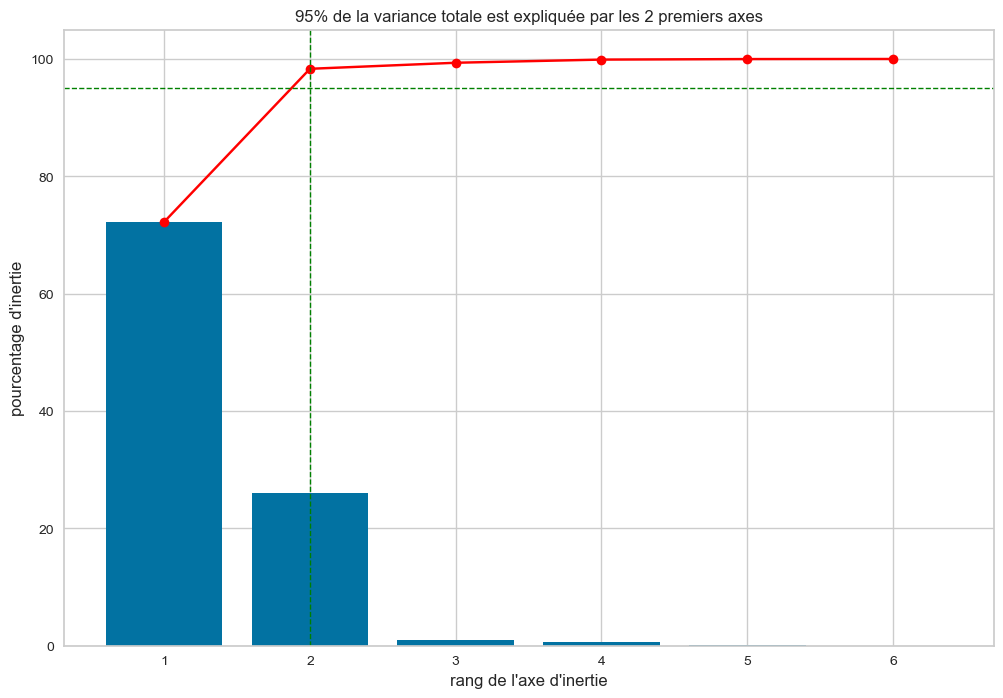

In [65]:
# Explained variance
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

***Il faut donc conserver 2 axes principaux pour expliquer la variance à 95%***

# Cercle des corrélations

In [72]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0):
    
    fig=plt.figure(figsize=(20,n_comp*2))
    count=1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            #fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=plt.subplot(int(n_comp/2),2,count)
            ax.set_aspect('equal', adjustable='box') 
            
            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #ajouter les axes 
            ax.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            ax.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, 
                                          round(100*pca.explained_variance_ratio_[d1],1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, 
                                          round(100*pca.explained_variance_ratio_[d2],1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count+=1
            
    plt.suptitle("Cercles des corrélations sur les 2 premiers axes".format(n_comp),
                 y=.9, color="blue", fontsize=18)        
    plt.show(block=False)

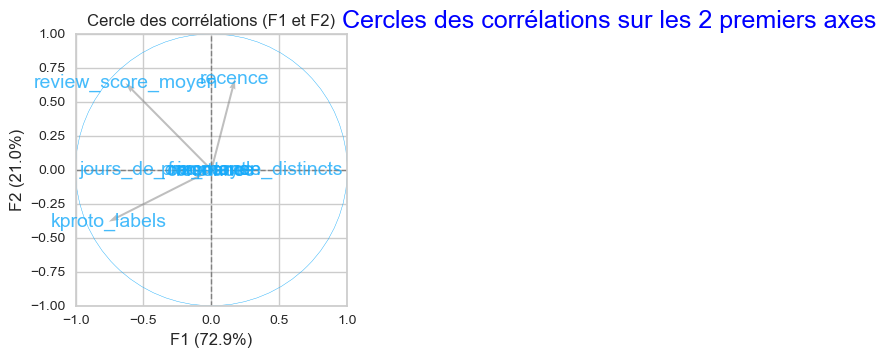

In [73]:
# Principal component space
pcs = pca.named_steps['pca'].components_

# Plot correlation circle
cerle_corr(pcs,
           6,
           pca.named_steps['pca'],
           [(0,1)],
           labels = np.array(X.columns))

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

On peut ainsi voir parfaitement les variables qui contribuent le plus à chaque axe. Par exemple, 

* la variable synthétique F1 représentera la régularité des clients.

* La variable synthétique F2 quant à elle représente la dépense et satisfaction.

Nous allons donc intégrer à notre pipeline Kmeans une PCA sur 2 composantes pour vérifier si la réduction dimensionnelle réduit la qualité de la segmentation 
    </h1>

# K-Means après réduction de dimenssions

In [69]:
# KMeans Pipeline with best K for PCA results
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(X_projected[:,:4])

# Kmeans labels
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
X_scaled_bis["kmeans_label_pca"] = pca_kmeans_labels
X_scaled_clusters_pca = X_scaled_bis.groupby("kmeans_label_pca").mean()
X_scaled_clusters_pca.iloc[:,:-1]

recence  frequence   montant  prix_moyen  \
kmeans_label_pca                                              
0                 0.301156   0.003243  0.001910    0.017800   
1                 0.610664   0.003033  0.001826    0.019026   
2                 0.375951   0.005369  0.002869    0.020154   
3                 0.243211   0.002634  0.001752    0.018385   

                  review_score_moyen  constance  
kmeans_label_pca                                 
0                           0.662901   0.005627  
1                           0.934348   0.001543  
2                           0.057878   0.002029  
3                           0.999182   0.006103

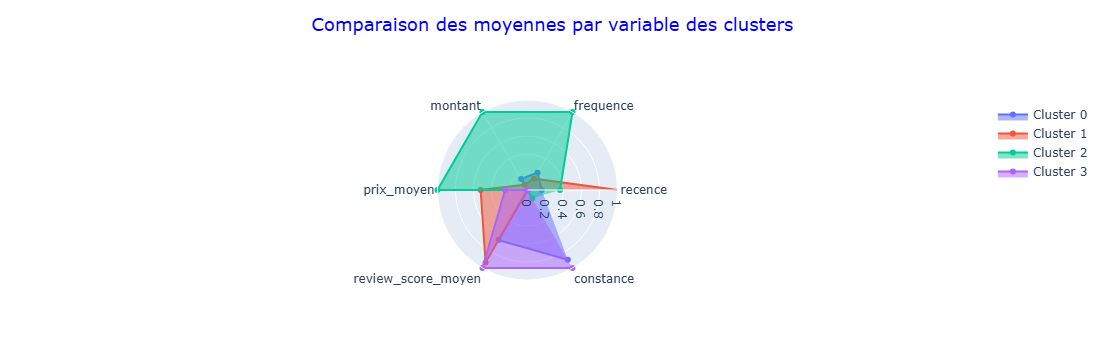

In [70]:
plot_radars(data=X_scaled_clusters_pca.iloc[:,:-1],
            group="kmeans_label_pca")

C:\Users\USER\anaconda4\lib\site-packages\sklearn\manifold\_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



4

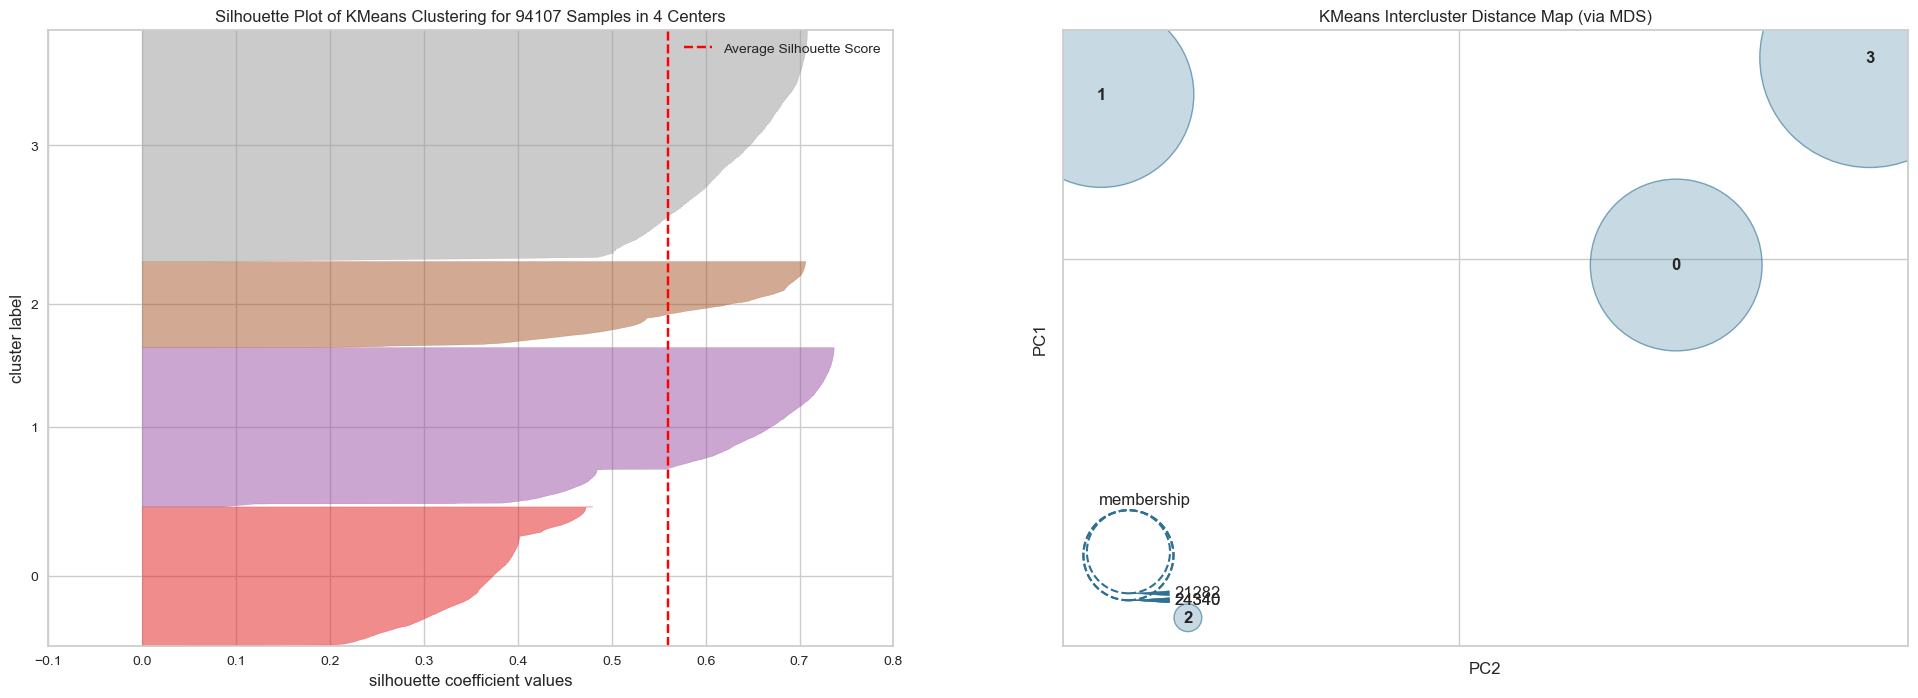

In [70]:
clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                data=X_projected[:,:4], 
                metric="distortion",
                elbow=False,
                mds=True,
                KBest=k)

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

On remarque donc ici que la réduction de dimenssion offre les mêmes axes de segmentation. Il est donc possible de réduire le nombre de features en entrée et d'utiliser les variables synthétiques de la PCA pour segmenter notre fichier client, ce d'autant que les scores silhouette sont ici meilleurs comparés au données brutes.
    </h1>

# Stabilité à l'initialisation du K-Means
<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

Notre algorithme du K-Means testé ici est initialisé avec la méthode K-Means++, ce qui réduit déjà les effets aléatoires de l'initialisation des centroïdes. Cependant, vous allons tester la stabilité à l'initialisation en entrainant plusieurs fois le modèle sans fixer le RandomState.

Pour les labels initiaux, nous allons conserver les clusters calculés dans le dernier modèle (avec PCA) puis les comparer grâce à l'indice de Rand ajusté (ARI) pour chacune des itérations.
    </h1>

In [72]:
labels = pca_kmeans_labels
pca_data = X_projected[:,:4]

In [73]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [74]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K, n_init=1, init="k-means++")
    bench_k_means(model = imodel, name="Iter "+str(i), 
                  data=pca_data, labels=labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.129s	2856	0.569	0.551	0.594
Iter 1   	0.088s	2673	0.949	0.948	0.947
Iter 2   	0.154s	2673	0.961	0.964	0.960
Iter 3   	0.125s	2674	0.943	0.940	0.941
Iter 4   	0.120s	2673	0.962	0.964	0.960
Iter 5   	0.108s	2673	0.961	0.964	0.960
Iter 6   	0.129s	2673	0.961	0.964	0.960
Iter 7   	0.124s	2673	0.962	0.964	0.960
Iter 8   	0.128s	2674	0.943	0.940	0.941
Iter 9   	0.114s	3278	0.519	0.393	0.512
_____________________________________________________


<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

Les différentes itérations montrent des inerties proches, une bonne homogénéité et un score AMI proche de 1. Nous pouvons donc en déduire que la stabilité à l'initialisation du modèle K-Means est bonne.
    </h1>

# Clustering avec l'algorithme du K-Prototypes

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

K-Prototypes Le K-Prototype est l'algorithme de clustering qui est la combinaison de K-Means et K-Mode. Dans l'algorithme du K-modes, la distance est mesurée par le nombre d'attributs catégoriels communs partagés par les deux points de données. K-Prototypes mesure la distance entre les variables numériques à l'aide de la distance euclidienne (comme le K-Means), mais mesure également la distance entre les entités catégorielles en utilisant le nombre de catégories correspondantes. Les principales étapes sont les suivantes : 1. Sélection k prototypes initiaux dans l'ensemble de données X. Il doit y en avoir un pour chaque cluster. 2. Allouer chaque objet de X à un cluster dont le prototype est le plus proche de lui. Cette allocation se fait en considérant la mesure de dissimilarité. 3. Une fois tout les objets alloués à un cluster, tester à nouveau la similitude des objets par rapport aux prototypes actuels. Si un individu est plus proche d'un autre cluster, les prototypes des deux clusters sont mis à jour.

Pour cet algorithme traitant les données mixtes, nous allons convertir quelques variables en variables catégorielles (comme les mois d'achat par exemple) pour leur donner plus de sens.
    </h1>

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

Pour l'algorithme K-Prototypes, nous n'avons pas besoin d'encoder les variables catégorielles. Nous allons donc normaliser uniquement les varaibles numériques 
    </h1>

In [ ]:
for c in indicator_rfm.select_dtypes(exclude="object").columns:
    scaler = MinMaxScaler()
    indicator_rfm[c] = scaler.fit_transform(np.array(indicator_rfm[c]).reshape(-1, 1))

In [17]:
# Categorical features index
cat_cols = [indicator_rfm.columns.get_loc(c) for c in indicator_rfm.select_dtypes(include="object").columns]

In [17]:
#Choosing optimal K
cost = []
for num_clusters in list(range(4,9)):
    n_clusters=num_clusters
    kproto = KPrototypes(n_clusters, init='Cao',n_init = 1,verbose=1)
    kproto.fit_predict(indicator_rfm, categorical=cat_cols)
    cost.append(kproto.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 25785, ncost: 7607.748301661945
Run: 1, iteration: 2/100, moves: 7047, ncost: 7537.072009583147
Run: 1, iteration: 3/100, moves: 1694, ncost: 7533.171931559152
Run: 1, iteration: 4/100, moves: 387, ncost: 7532.961602250541
Run: 1, iteration: 5/100, moves: 90, ncost: 7532.93716713525
Run: 1, iteration: 6/100, moves: 13, ncost: 7532.9352547689805
Run: 1, iteration: 7/100, moves: 0, ncost: 7532.9352547689805
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12923, ncost: 7251.857058070064
Run: 1, iteration: 2/100, moves: 5198, ncost: 7016.2367111523745
Run: 1, iteration: 3/100, moves: 3806, ncost: 6958.212567871882
Run: 1, iteration: 4/100, moves: 3530, ncost: 6928.5

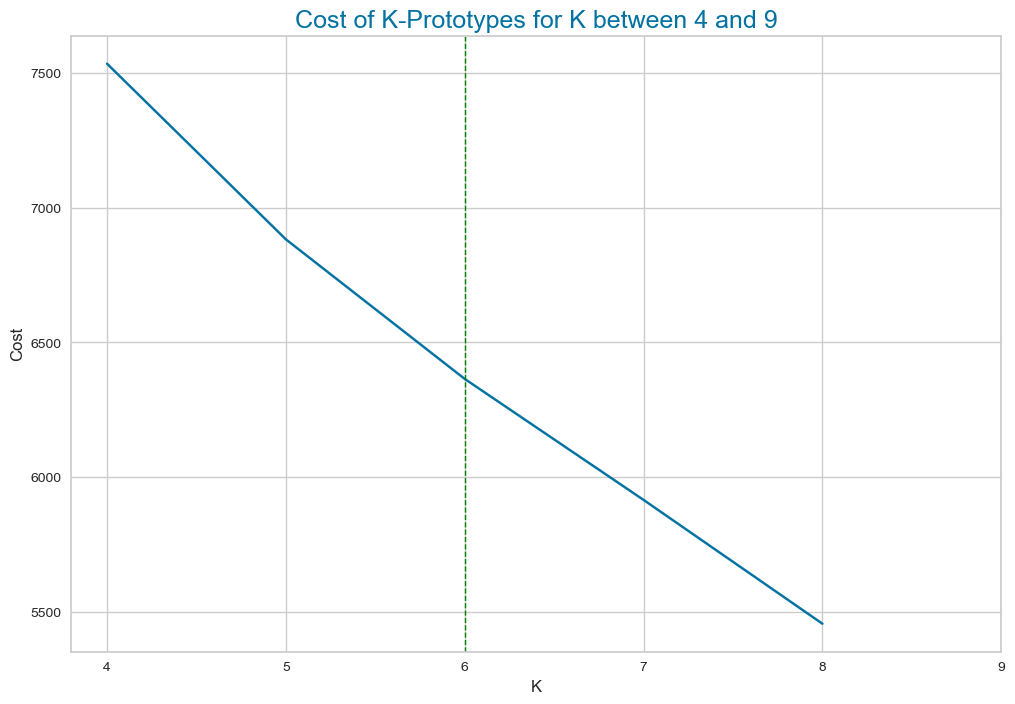

In [18]:
plt.figure(figsize=(12,8))
plt.plot(cost)
plt.xticks(np.arange(0,6,1), np.arange(4,10,1))
plt.axvline(x=2, linestyle="--", 
            color="green",
            linewidth=1)
plt.xlabel("K")
plt.ylabel("Cost")
plt.title("Cost of K-Prototypes for K between 4 and 9",
          fontsize=18, color="b")
plt.show()

Puis on initialise l'algorithme :

In [18]:
kproto = KPrototypes(n_clusters= 4, init='Cao',n_init = 1,verbose=1)
kproto_labels = kproto.fit_predict(indicator_rfm, categorical=cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22820, ncost: 7065.470309289027
Run: 1, iteration: 2/100, moves: 11133, ncost: 6750.949875455331
Run: 1, iteration: 3/100, moves: 2396, ncost: 6738.024403461991
Run: 1, iteration: 4/100, moves: 854, ncost: 6736.495189470612
Run: 1, iteration: 5/100, moves: 318, ncost: 6736.281745100591
Run: 1, iteration: 6/100, moves: 113, ncost: 6736.253079353077
Run: 1, iteration: 7/100, moves: 65, ncost: 6736.242737020175
Run: 1, iteration: 8/100, moves: 1, ncost: 6736.242718876173
Run: 1, iteration: 9/100, moves: 0, ncost: 6736.242718876173


In [22]:
indicator_rfm["kproto_labels"] = kproto_labels


In [23]:
# Exclure les colonnes non numériques avant d'effectuer l'agrégation
numeric_cols = indicator_rfm.select_dtypes(include=np.number).columns
numeric_indicator_rfm = indicator_rfm[numeric_cols]

# Effectuer l'agrégation sur les colonnes numériques
aggregated_rfm = numeric_indicator_rfm.groupby("kproto_labels").mean()
aggregated_rfm 

recence  frequence   montant  prix_moyen  review_score_moyen  \
kproto_labels                                                                  
0              0.375940   0.005361  0.002868    0.020154            0.057760   
1              0.610696   0.003036  0.001827    0.019026            0.938334   
2              0.305681   0.003241  0.001908    0.017819            0.662241   
3              0.243213   0.002635  0.001752    0.018384            0.999179   

               constance  jours_de_commande_distincts   resence  
kproto_labels                                                    
0               0.001958                     0.000913  0.001958  
1               0.001500                     0.001025  0.001500  
2               0.005632                     0.001950  0.005632  
3               0.006120                     0.001979  0.006120

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

Nous observons que les résultats obtenus avec la méthode K-prototype sont presque identiques à ceux obtenus avec la méthode K-means. Cependant, K-prototype nécessite plus de temps. Par conséquent, nous continuerons à utiliser la méthode K-means.
    </h1>

# CAH sur echantillon 

### Classification ascendante hiérarchique


## Classification ascendante hiérarchique
   ### Utilisation du package « scipy »


In [24]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, indicator_rfm)])

In [25]:
X = indicator_rfm.copy()
X.head(10)

recence  frequence   montant  prix_moyen  review_score_moyen  constance  \
0  0.207254   0.000000  0.001298    0.019164                1.00        0.0   
1  0.211140   0.000000  0.000249    0.002680                0.75        0.0   
2  0.757772   0.000000  0.000789    0.010120                0.50        0.0   
3  0.477979   0.000000  0.000399    0.003733                0.75        0.0   
4  0.435233   0.000000  0.001801    0.026603                1.00        0.0   
5  0.251295   0.000000  0.001528    0.022742                0.75        0.0   
6  0.233161   0.000000  0.000324    0.004030                0.75        0.0   
7  0.299223   0.013514  0.007669    0.028237                0.00        0.0   
8  0.765544   0.000000  0.001373    0.019921                0.75        0.0   
9  0.283679   0.000000  0.001187    0.015451                0.00        0.0   

   jours_de_commande_distincts  resence  \
0                          0.0      0.0   
1                          0.0      0.0   
2                          0.0      0.0   
3                          0.0      0.0   
4                          0.0      0.0   
5                          0.0      0.0   
6                          0.0      0.0   
7                          0.0      0.0   
8                          0.0      0.0   
9                          0.0      0.0   

   customer_unique_id_0000366f3b9a7992bf8c76cfdf3221e2  \
0                                               True     
1                                              False     
2                                              False     
3                                              False     
4                                              False     
5                                              False     
6                                              False     
7                                              False     
8                                              False     
9                                              False     

   customer_unique_id_0000b849f77a49e4a4ce2b2a4ca5be3f  ...  \
0                                              False    ...   
1                                               True    ...   
2                                              False    ...   
3                                              False    ...   
4                                              False    ...   
5                                              False    ...   
6                                              False    ...   
7                                              False    ...   
8                                              False    ...   
9                                              False    ...   

   customer_unique_id_fff96bc586f78b1f070da28c4977e810  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     
5                                              False     
6                                              False     
7                                              False     
8                                              False     
9                                              False     

   customer_unique_id_fffa431dd3fcdefea4b1777d114144f2  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     
5                                              False     
6                                              False     
7                                              False     
8                                              False     
9                                              False     

   customer_unique_id_fffb09418989a0dbff854a28163

In [26]:
# Step 3: Preprocessing the data
# Sélectionner uniquement les colonnes numériques
X = X.select_dtypes(include=[np.number])
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [27]:
# Explained variance
pca = PCA()
pca.fit(X_normalized)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.46351454e-01 2.27021817e-01 1.15304060e-01 7.91586335e-02
 6.30357213e-02 2.12834582e-02 4.59046197e-03 3.69777297e-03
 1.48909418e-34]
[4.64734792e-01 2.36371891e-01 1.20052949e-01 8.24188445e-02
 6.56318974e-02 2.21600343e-02 4.77952378e-03 3.85006868e-03
 1.55042370e-34]


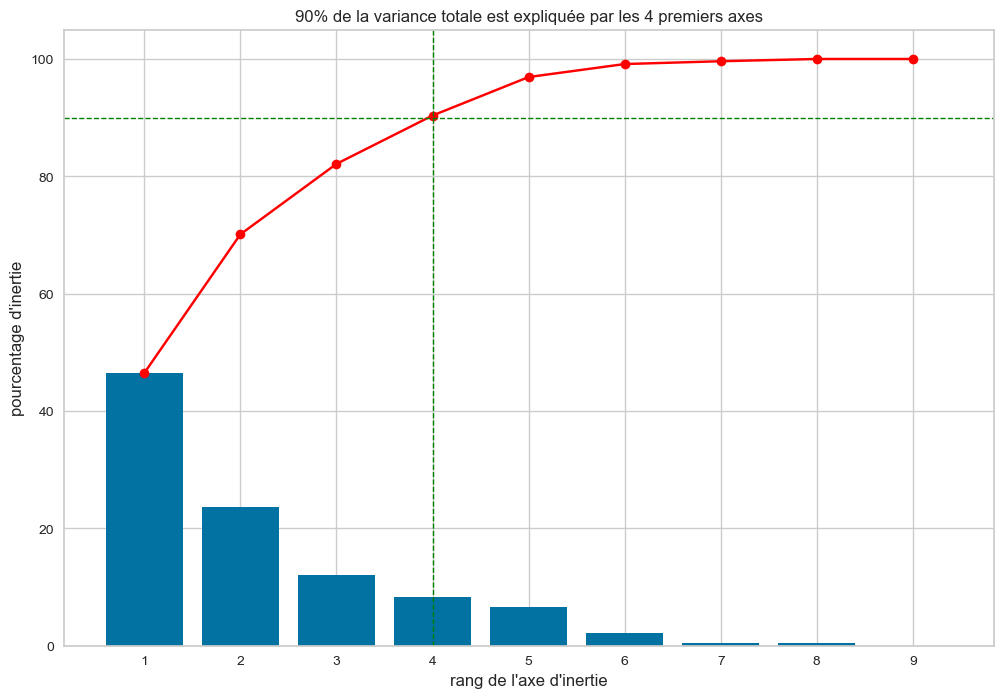

In [28]:
# Explained variance
pca = PCA()
pca.fit(X_normalized)
varexpl = pca.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=90, linestyle="--", 
            color="green",
            linewidth=1)

limit = 90
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [29]:
# 4 : Réduire la dimensionnalité des Données

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
 X_train, X_test,  = train_test_split(
                     X_principal,  test_size=0.8, random_state=0)

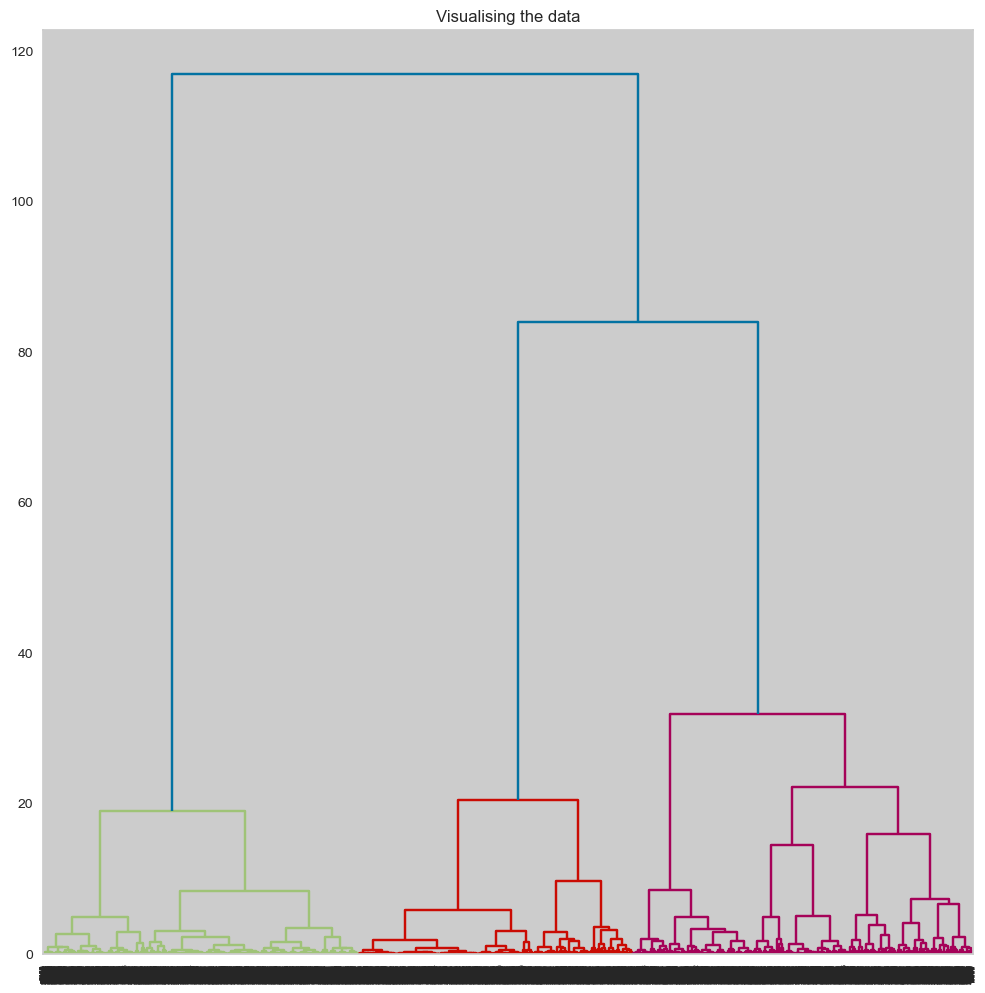

In [115]:
# Dendograms are used to divide a given cluster into many different clusters.

# Step 5: Visualizing the working of the Dendograms

plt.figure(figsize =(12, 12))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_train, method ='ward')))

In [32]:
 y_train, y_test,  = train_test_split(
                     X_principal,  test_size=0.2, random_state=0)

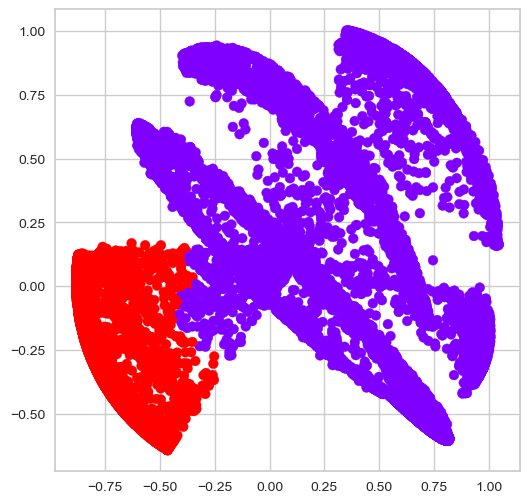

In [36]:
# Step 6: Building and Visualizing the different clustering models for different values of k
# k = 2

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac2.fit_predict(y_test), cmap ='rainbow')
plt.show()

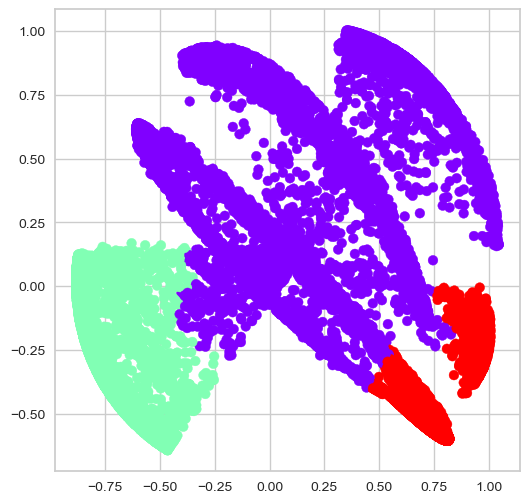

In [33]:
# k = 3

ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac3.fit_predict(y_test), cmap ='rainbow')
plt.show()

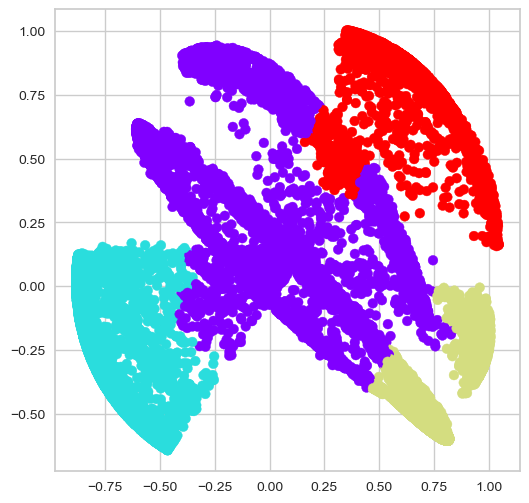

In [34]:
# k = 4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac4.fit_predict(y_test), cmap ='rainbow')
plt.show()

### Nous déterminons maintenant le nombre optimal de clusters en utilisant une technique mathématique. Ici, nous utiliserons les scores de silhouette à cette fin.

In [37]:
# Step 7: Evaluating the different models and Visualizing the results.

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(y_test, ac2.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac3.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac4.fit_predict(y_test)))

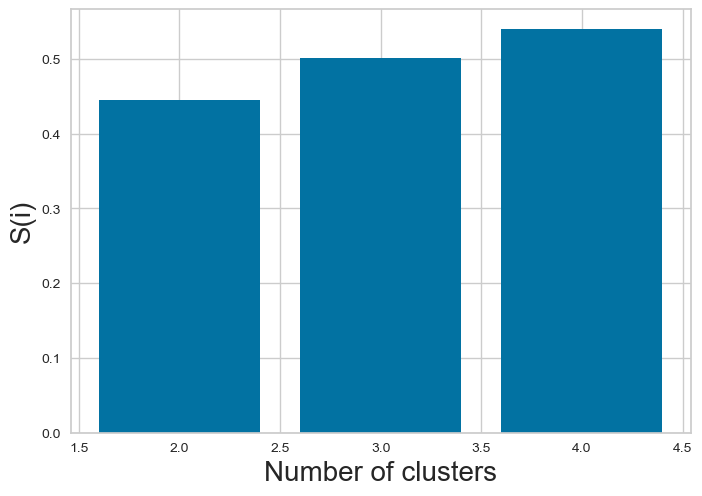

In [40]:
# Plotting a bar graph to compare the results
k = [2, 3, 4]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Ainsi, avec l'aide des scores de silhouette, on conclut que le nombre optimal de clusters pour les données données et la technique de regroupement est de 3.

In [41]:
Xbis_train,Xbis_test   = train_test_split(
                     X_normalized,  test_size=0.8, random_state=0)

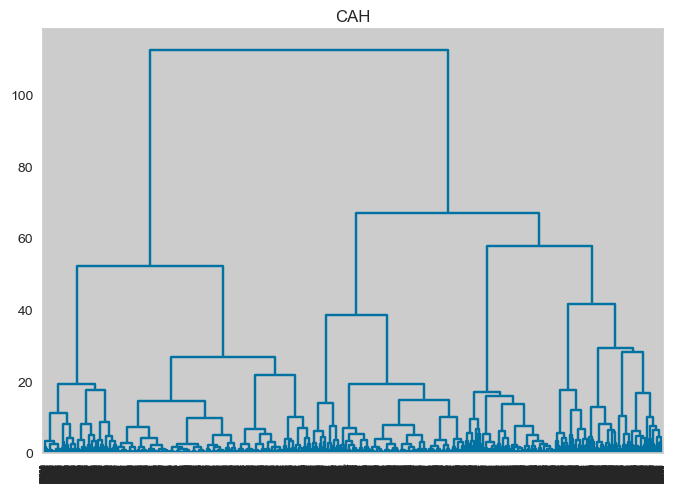

In [42]:
from scipy.cluster.hierarchy import linkage,dendrogram
Z = linkage(Xbis_train,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("Methode de ward")
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=0)
plt.show()


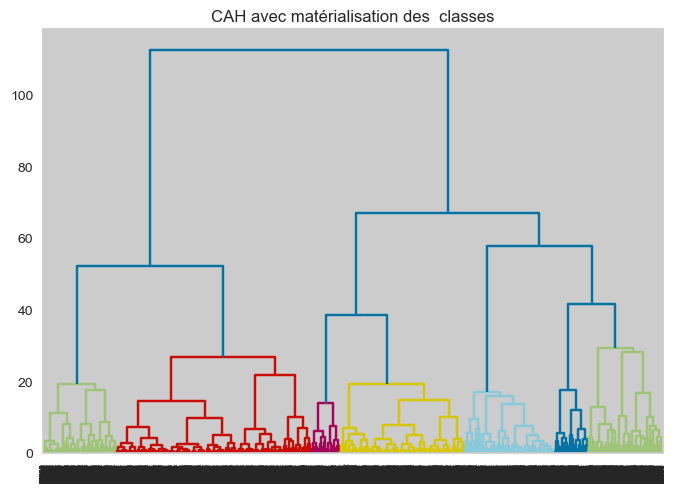

[4 6 1 ... 2 1 4]
        0
1   76309
1   63085
1    3065
1   14121
1   11106
..    ...
7   80387
7   41432
7   90534
7   16593
7    4571

[18821 rows x 1 columns]


In [43]:
from scipy.cluster.hierarchy import ward, fcluster
#matérialisation des classes (hauteur t = 38)
plt.title('CAH avec matérialisation des  classes')
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=38)
plt.show()
#découpage à la hauteur t = 38==> identifiants de 6 groupes obtenus
groupes_cah = fcluster(Z,t=38,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(X_train.index[idg],groupes_cah[idg]))


In [44]:
Xbis_train = pd.DataFrame(Xbis_train, index=Xbis_train.index, columns=Xbis_train.columns)
Xbis_train_clusters = Xbis_train.mean()
Xbis_train_clusters

0   -0.019734
1   -0.089314
2   -0.060396
3   -0.066667
4    0.066855
5   -0.059544
6   -0.071500
7   -0.059544
8    0.076242
dtype: float64

# CLUSTERING PAR DBSCAN

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

Le DBSCAN est un algorithme simple qui définit des clusters en utilisant l’estimation de la densité locale. On peut le diviser en 4 étapes :

Pour chaque observation on regarde le nombre de points à au plus une distance ε de celle-ci. On appelle cette zone le ε-voisinage de l’observation.
Si une observation compte au moins un certain nombre de voisins y compris elle-même, elle est considérée comme une observation cœur. On a alors décelé une observation à haute densité.
Toutes les observations au voisinage d’une observation cœur appartiennent au même cluster. Il peut y avoir des observations cœur proche les unes des autres. Par conséquent de proche en proche on obtient une longue séquence d’observations cœur qui constitue un unique cluster.
Toute observation qui n’est pas une observation cœur et qui ne comporte pas d’observation cœur dans son voisinage est considérée comme une anomalie.
</h1>

In [46]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
labels = db_default.labels_

In [47]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [48]:
# Step 5: Building the clustering model
from sklearn import metrics
labels_true = X.index
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.025, min_samples = 5).fit(X_principal)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 11
Estimated number of noise points: 73
Homogeneity: 0.0018
Completeness: 1.0000
V-measure: 0.0036
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000
Silhouette Coefficient: -0.3775


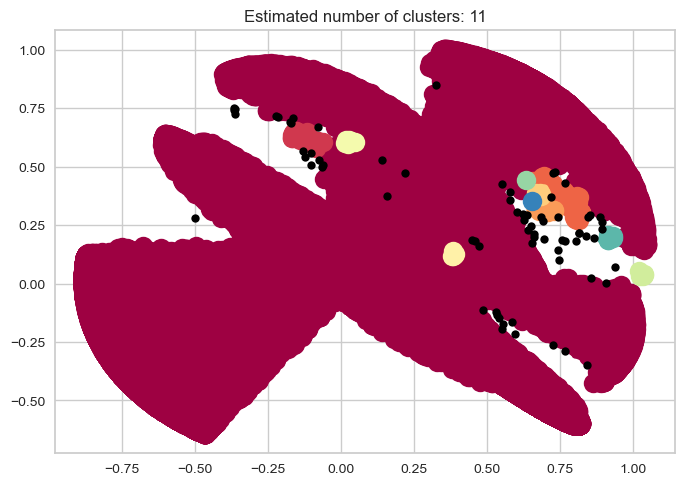

In [49]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_principal[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_principal[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN clustering de la donnée brute (sans PCA)

In [ ]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.405, min_samples = 5).fit(X_normalized)
labels = db_default.labels_

In [ ]:
np.unique(labels)

In [ ]:
# Step 5: Building the clustering model
from sklearn import metrics
labels_true = X.index
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.405, min_samples = 5).fit(X_normalized)
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(X, labels))

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_normalized[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_normalized[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Conclusion


## Interprétation métier des clusters

<h1 style = "line-height: 1.5;text-align: justify; font-family:Times New Roman;font-size:20px;"> 

* Groupe 0 :  Clients sont ireguliers dans la boutique olist qui sont sastifaits des commandes effectuées avec des prix moyens relativement faible sur un nombre de commande très réduit.

* Groupe 1 : Clients relativement moins récents et relativement régulier qui lors de leur  achat ont consentis un prix moyen très élevé. Il s'agit d'une clientèle ihabituelle dont les achats sont éffectués à un montant très élevé
    
* Groupe 2 : clients qui sont relativement irrégulier et mons récents et effectuent peu de commande à un prix moyen relativement faible. 
    
* Groupe 3 : Clients très réccents et réguliers qui sont satisfaits de leurs commande. Ils ont faible nombre de commande mais effectué dans la même journée. Ils ont un consentement pour un prix moyen considerable sur les commandes.

Nous allons à présent réaliser une réduction dimensionnelle pour vérifier si le clustering est réalisable sur un nombre réduit de variables sans perturber les groupes
    </h1>